# Storytelling Data Visualization on Exchange Rates
I show how the euro-dollar rate has changed during the coronavirus pandemic.

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. Daria Chemkaeva put together the data set and made it available on Kaggle — the data source is the European Central Bank. Note that the dataset gets regular updates — I downloaded it on January 2021.

## Data Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data Cleaning

The focus will be on the exchange rate between the euro and the American dollar.

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [6]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.1163     1
1.2472     1
1.2615     1
1.2811     1
1.1352     1
Name: US_dollar, Length: 3528, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

Use rolling mean to hide daily variation and show only the long-term trends.

In [8]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          5637 non-null   datetime64[ns]
 1   US_dollar     5637 non-null   float64       
 2   rolling_mean  5608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 176.2 KB


## Making Graph
I can show the 2020 data and the 2016-2019 data as a baseline with a line plot.

In [9]:
import datetime
dt = datetime.date(year=2016, month=1, day=1)
ordinal = dt.toordinal()
ordinal

735964

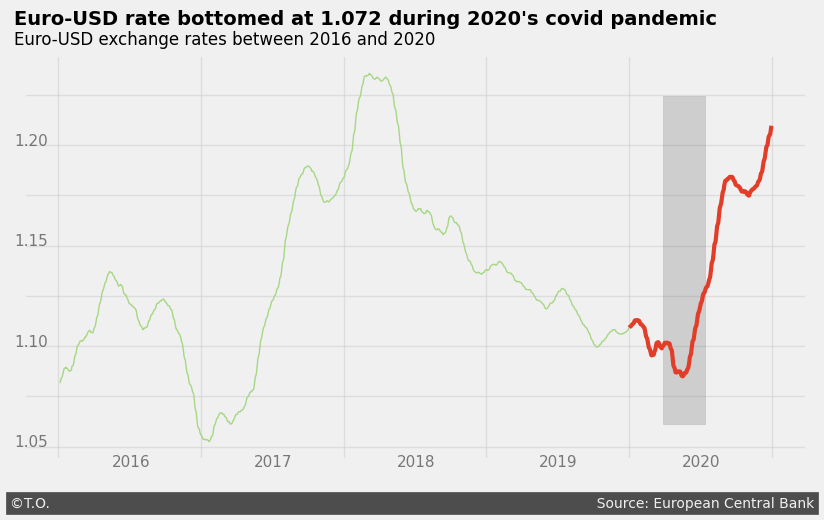

In [10]:
covid_pandemic = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2016
                   ) & (euro_to_dollar['Time'].dt.year <= 2020)]
covid_pandemic_20 = euro_to_dollar.copy(
                   )[euro_to_dollar.Time.dt.year == 2020]

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(covid_pandemic['Time'], covid_pandemic['rolling_mean'], linewidth=1, color='#A6D785')

### Highlighting the 2020 period
ax.plot(covid_pandemic_20['Time'],
        covid_pandemic_20['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the bottom of the crisis
ax.axvspan(xmin=737512.0, xmax=737620.0, ymin=0.09, ymax=0.9,
           alpha=0.3, color='grey')

### Adding a signature
ax.text(735840, 1.02, '©T.O.' + ' '*125 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 736100.0
for year in ['2016', '2017', '2018', '2019', '2020']:
    ax.text(x, 1.040, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.050
for rate in ['1.05', '1.10', '1.15', '1.20']:
    ax.text(735850.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.05

### Add some transparency to the grid
ax.grid(alpha=0.5)

## Adding a title and a subtitle    
ax.text(735850.0, 1.26, "Euro-USD rate bottomed at 1.072 during 2020's covid pandemic",
        weight='bold')
ax.text(735850.0, 1.25, 'Euro-USD exchange rates between 2016 and 2020',
        size=12)

plt.show()